In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_excel("KTM raw data.xlsx")

In [3]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1518 non-null   int64 
 1   Age           1518 non-null   int64 
 2   Gender        1518 non-null   object
 3   Occupation    1518 non-null   object
 4   Phone Type    1518 non-null   object
 5   Current Bike  1518 non-null   object
 6   Relationship  1518 non-null   object
 7   Response      1518 non-null   object
dtypes: int64(2), object(6)
memory usage: 95.0+ KB


In [5]:
df['Gender'].value_counts()

Female    816
Male      702
Name: Gender, dtype: int64

In [6]:
df['Occupation'].value_counts()

Student          686
Self Employed    295
Unemployed       274
Professional     263
Name: Occupation, dtype: int64

In [7]:
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [8]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,1,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,0,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,0,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,0,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,1,Student,Average,180 to 220,Complicated,Purchased


In [9]:
df['Occupation'] = df['Occupation'].map({'Student':1,'Unemployed':2,'Self Employed':3,'Professional':4})

In [10]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,1,4,Average,180 to 220,Complicated,Not purchased
1,2,27,0,3,Low End,No Bike,Single,Purchased
2,3,39,0,2,Average,180 to 220,Married,Not purchased
3,4,20,0,2,High End,No Bike,Married,Not purchased
4,5,29,1,1,Average,180 to 220,Complicated,Purchased


In [11]:
df = pd.get_dummies(df,columns = ['Occupation'])

In [12]:
df.head()

,ID,Age,Gender,Phone Type,Current Bike,Relationship,Response,Occupation_1,Occupation_2,Occupation_3,Occupation_4
0,1,53,1,Average,180 to 220,Complicated,Not purchased,0,0,0,1
1,2,27,0,Low End,No Bike,Single,Purchased,0,0,1,0
2,3,39,0,Average,180 to 220,Married,Not purchased,0,1,0,0
3,4,20,0,High End,No Bike,Married,Not purchased,0,1,0,0
4,5,29,1,Average,180 to 220,Complicated,Purchased,1,0,0,0


In [13]:
df['Phone Type'].value_counts()

High End    836
Low End     343
Average     339
Name: Phone Type, dtype: int64

In [14]:
df['Phone Type'] = df['Phone Type'].map({'High End':1,'Low End':2,'Average':3})

In [15]:
df = pd.get_dummies(df,columns = ['Phone Type'])

In [16]:
df.head()

,ID,Age,Gender,Current Bike,Relationship,Response,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3
0,1,53,1,180 to 220,Complicated,Not purchased,0,0,0,1,0,0,1
1,2,27,0,No Bike,Single,Purchased,0,0,1,0,0,1,0
2,3,39,0,180 to 220,Married,Not purchased,0,1,0,0,0,0,1
3,4,20,0,No Bike,Married,Not purchased,0,1,0,0,1,0,0
4,5,29,1,180 to 220,Complicated,Purchased,1,0,0,0,0,0,1


In [17]:
df['Current Bike'].value_counts()

180 to 220       420
125 to 180       333
Below 125        300
No Bike          254
220 and Above    211
Name: Current Bike, dtype: int64

In [18]:
df['Current Bike'] = df['Current Bike'].map({'No Bike':1,'Below 125':2,'125 to 180':3,'180 to 220':4,'220 and Above':5})

In [19]:
df.head()

,ID,Age,Gender,Current Bike,Relationship,Response,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3
0,1,53,1,4,Complicated,Not purchased,0,0,0,1,0,0,1
1,2,27,0,1,Single,Purchased,0,0,1,0,0,1,0
2,3,39,0,4,Married,Not purchased,0,1,0,0,0,0,1
3,4,20,0,1,Married,Not purchased,0,1,0,0,1,0,0
4,5,29,1,4,Complicated,Purchased,1,0,0,0,0,0,1


In [20]:
df = pd.get_dummies(df,columns = ['Current Bike'])

In [21]:
df.head()

,ID,Age,Gender,Relationship,Response,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3,Current Bike_1,Current Bike_2,Current Bike_3,Current Bike_4,Current Bike_5
0,1,53,1,Complicated,Not purchased,0,0,0,1,0,0,1,0,0,0,1,0
1,2,27,0,Single,Purchased,0,0,1,0,0,1,0,1,0,0,0,0
2,3,39,0,Married,Not purchased,0,1,0,0,0,0,1,0,0,0,1,0
3,4,20,0,Married,Not purchased,0,1,0,0,1,0,0,1,0,0,0,0
4,5,29,1,Complicated,Purchased,1,0,0,0,0,0,1,0,0,0,1,0


In [22]:
df['Relationship'].value_counts()

Single         490
Complicated    384
Committed      331
Married        313
Name: Relationship, dtype: int64

In [23]:
df['Relationship'] = df['Relationship'].map({'Single':1,'Complicated':2,'Committed ':3,'Married':4})

In [24]:
df = pd.get_dummies(df,columns = ['Relationship'])

In [25]:
df.head()

,ID,Age,Gender,Response,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3,Current Bike_1,Current Bike_2,Current Bike_3,Current Bike_4,Current Bike_5,Relationship_1.0,Relationship_2.0,Relationship_4.0
0,1,53,1,Not purchased,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,2,27,0,Purchased,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,3,39,0,Not purchased,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,4,20,0,Not purchased,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,29,1,Purchased,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [26]:
df['Response'].value_counts()

Purchased        872
Not purchased    646
Name: Response, dtype: int64

In [27]:
labelencoder = LabelEncoder()
df['Response'] = labelencoder.fit_transform(df['Response'])

In [28]:
df.head()

,ID,Age,Gender,Response,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3,Current Bike_1,Current Bike_2,Current Bike_3,Current Bike_4,Current Bike_5,Relationship_1.0,Relationship_2.0,Relationship_4.0
0,1,53,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,2,27,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,3,39,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,4,20,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,29,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

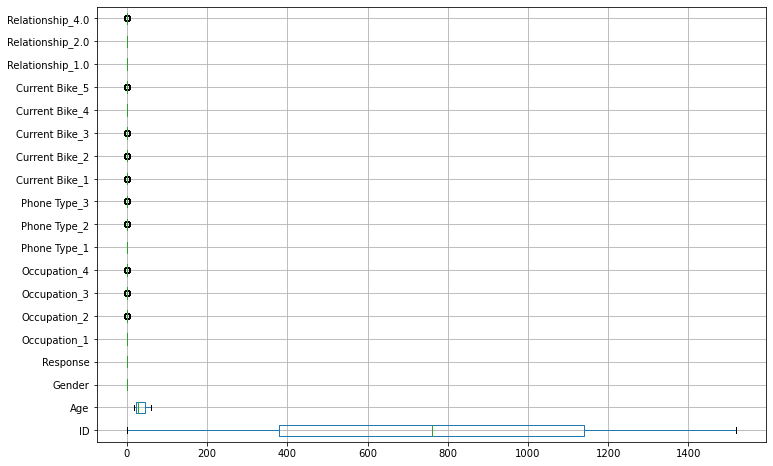

In [47]:
plt.figure(figsize = (12,8))
df.boxplot(vert = 0)

In [30]:
x = df.drop(['ID','Response'],axis = 1)
y = df['Response']

In [31]:
x

,Age,Gender,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3,Current Bike_1,Current Bike_2,Current Bike_3,Current Bike_4,Current Bike_5,Relationship_1.0,Relationship_2.0,Relationship_4.0
0,53,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,27,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
2,39,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,20,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,29,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,19,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1514,18,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1515,24,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1516,23,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [32]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1513    1
1514    1
1515    1
1516    1
1517    1
Name: Response, Length: 1518, dtype: int32

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 1)

In [34]:
x_train

,Age,Gender,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3,Current Bike_1,Current Bike_2,Current Bike_3,Current Bike_4,Current Bike_5,Relationship_1.0,Relationship_2.0,Relationship_4.0
1209,19,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1073,19,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
824,50,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
978,47,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
538,30,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,41,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
905,28,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
1096,18,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
235,36,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [35]:
x_test

,Age,Gender,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Phone Type_1,Phone Type_2,Phone Type_3,Current Bike_1,Current Bike_2,Current Bike_3,Current Bike_4,Current Bike_5,Relationship_1.0,Relationship_2.0,Relationship_4.0
902,25,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
368,21,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1218,24,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1028,24,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1323,24,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,19,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
926,24,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
275,36,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1125,19,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [36]:
y_train

1209    1
1073    1
824     0
978     0
538     0
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: Response, Length: 1062, dtype: int32

In [37]:
y_test

902     0
368     1
1218    1
1028    1
1323    1
       ..
1318    1
926     0
275     1
1125    1
1148    1
Name: Response, Length: 456, dtype: int32

## Model Building :
1. Model object creation
2. Model fitting
3. Model prediction
4. Model Evaluation

In [38]:
model = LogisticRegression()

In [39]:
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

In [42]:
y_test

902     0
368     1
1218    1
1028    1
1323    1
       ..
1318    1
926     0
275     1
1125    1
1148    1
Name: Response, Length: 456, dtype: int32

In [43]:
#r2_score(y_test,y_pred)

In [44]:
#mean_squared_error(y_test,y_pred)

In [45]:
#np.sqrt(mean_squared_error(y_test,y_pred))

In [46]:
accuracy_score(y_test,y_pred)

0.7894736842105263